# BT4012 Without Text Analysis

### Setting up the environment

In [1]:
# libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# setting up
# import packages here
# from google.colab import drive
# drive.mount('/content/drive')
# url = '/content/drive/MyDrive/fake_job_postings.csv'

# import from github repo
url = 'https://raw.githubusercontent.com/LordZhiHao/BT4012_Fraud_Analytics_Project/main/fake_job_postings.csv'

# read data
data = pd.read_csv(url)
df = data.copy()
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Handling Null Values

EDA plz do refer other scripts

Will dive straight into handling the null values and outliers

In [3]:
# keep track of what columns to keep and drop
cols_to_keep = []
cols_to_drop = []

In [4]:
# check for NA values
df.isna().any()

job_id                 False
title                  False
location                True
department              True
salary_range            True
company_profile         True
description             True
requirements            True
benefits                True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

In [5]:
# check for num of na values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
# handle location and description first since easier

# handle location - split into nation and city and fillna with unknown
df['location'] = df['location'].fillna('NA, Unknown')
df['country'] = df['location'].apply(lambda x : x.strip()[:2])
df['city'] = df['location'].apply(lambda x : x.split(',')[-1])

# a lot of sparse values noted for countries, may lead to unexpected results - to handle - keep countries with counts >10 only and put others for the rest
ls_of_countries = [country if df[df['country']==country]['country'].count() >= 10 else 'Others' for country in df['country'].unique()]
df['country'] = df['country'].apply(lambda x : x if x in ls_of_countries else 'Others')

ls_of_cities = [city if df[df['city']==city]['city'].count() >= 10 else 'Others' for city in df['city'].unique()]
df['city'] = df['city'].apply(lambda x : x if x in ls_of_cities else 'Others')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('country')
cols_to_keep.append('city')
cols_to_drop.append('location')

In [7]:
# handle description - convert to binary - with or without
df['has_description'] = df['description'].apply(lambda x: 0 if pd.isna(x) else 1)

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('has_description')
cols_to_drop.append('description')

In [8]:
# handle department - q a lot of departments - keep only those with high count and take everything else as others
ls_of_dept = [dept if df[df['department']==dept]['department'].count() >= 10 else 'Others' for dept in df['department'].unique()]
df['has_department'] = df['department'].apply(lambda x : x if x in ls_of_dept else 'Others')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('has_department')
cols_to_drop.append('department')

In [9]:
# handle salary_range - q a lot of ranges - keep as binary - has_salary or not
df['has_salary'] = df['salary_range'].apply(lambda x : 0 if pd.isna(x) else 1)

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('has_salary')
cols_to_drop.append('salary_range')

In [10]:
cols_to_drop # handled these colummns

['location', 'description', 'department', 'salary_range']

In [11]:
# handle company_profile, requirements and benefits next - for simplicity - keep as binary - has or not
df['has_company_profile'] = df['company_profile'].apply(lambda x : 0 if pd.isna(x) else 1)
df['has_requirements'] = df['requirements'].apply(lambda x : 0 if pd.isna(x) else 1)
df['has_benefits'] = df['benefits'].apply(lambda x : 0 if pd.isna(x) else 1)

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('has_company_profile')
cols_to_keep.append('has_requirements')
cols_to_keep.append('has_benefits')
cols_to_drop.append('company_profile')
cols_to_drop.append('requirements')
cols_to_drop.append('benefits')

In [12]:
# handle employment_type - keep na values as unknown
df['employment_type'] = df['employment_type'].fillna('Unknown')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('employment_type')

In [13]:
df['required_experience'].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [14]:
# handle required_experience - keep na values as unknown
df['required_experience'] = df['required_experience'].fillna('Unknown')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('required_experience')

In [15]:
df['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [16]:
# handle required_education - keep na values as unknown
df['required_education'] = df['required_education'].fillna('Unknown')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('required_education')

In [17]:
cols_to_keep

['country',
 'city',
 'has_description',
 'has_department',
 'has_salary',
 'has_company_profile',
 'has_requirements',
 'has_benefits',
 'employment_type',
 'required_experience',
 'required_education']

In [18]:
# handle industry - keep the industries - fillna with unknown
df['industry'] = df['industry'].fillna('Unknown')

# a lot of sparse values noted for industries, may lead to unexpected results - to handle - keep countries with counts >10 only and put unknown for the rest
ls_of_industries = [industry if df[df['industry']==industry]['industry'].count() >= 10 else 'Others' for industry in df['industry'].unique()]
df['industry'] = df['industry'].apply(lambda x : x if x in ls_of_industries else 'Others')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('industry')

In [19]:
# handle function - keep the functions - fillna with unknown
df['function'] = df['function'].fillna('Unknown')

# keep track in cols_to_keep and cols_to_drop
cols_to_keep.append('function')

In [20]:
cols_to_keep

['country',
 'city',
 'has_description',
 'has_department',
 'has_salary',
 'has_company_profile',
 'has_requirements',
 'has_benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

In [21]:
cols_to_drop

['location',
 'description',
 'department',
 'salary_range',
 'company_profile',
 'requirements',
 'benefits']

## Next we look into the non null columns to extract what we wanna keep

In [22]:
# drop the cols inside cols_to_drop as it is not useful anymore
df = df.drop(cols_to_drop, axis=1)

In [23]:
cols_to_drop = []

In [24]:
df.isna().sum()

job_id                 0
title                  0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
city                   0
has_description        0
has_department         0
has_salary             0
has_company_profile    0
has_requirements       0
has_benefits           0
dtype: int64

In [25]:
# handle job_id - it is unique for all - so not much value - remove the col
df = df.drop('job_id', axis=1)

In [26]:
# handle title - a bit too many distinct roles - may lead to overfitting issues - would remove the cols - flexible to choose to ohe or use as text feature
df = df.drop('title', axis=1)

In [27]:
# handle telecommuting, has_company_logo, has_questions - all are binary - keep as features
# keep track in cols_to_keep
cols_to_keep.append('telecommuting')
cols_to_keep.append('has_company_logo')
cols_to_keep.append('has_questions')

And with that all the columns are processed accordingly

In [28]:
cols_to_keep

['country',
 'city',
 'has_description',
 'has_department',
 'has_salary',
 'has_company_profile',
 'has_requirements',
 'has_benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'telecommuting',
 'has_company_logo',
 'has_questions']

## Train-test split and preprocessing before inputting into model

In [29]:
# seperate out the correctly formatted cols and those which still needs processing through ohe
binary_cols = ['has_description', 'has_salary', 'has_company_profile', 'has_requirements', 'has_benefits', 'telecommuting', 'has_company_logo', 'has_questions']
ohe_needed_cols = []

for cols in cols_to_keep:
  if cols not in binary_cols:
    ohe_needed_cols.append(cols)

In [30]:
# select the fraudulent column as target, rest as features
features = df.drop('fraudulent', axis=1)
target_var = df['fraudulent']

In [31]:
# do ohe for ohe_needed_cols
features_encoded = pd.get_dummies(features, columns=ohe_needed_cols).astype(int)

In [32]:
features_encoded # check the colummns if its in correct format

,telecommuting,has_company_logo,has_questions,has_description,has_salary,has_company_profile,has_requirements,has_benefits,country_AE,country_AT,...,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Unknown,function_Writing/Editing
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17876,0,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17878,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# train test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features_encoded, target_var, random_state=42, test_size=0.2)

## Model training

In [34]:
# model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from xgboost import XGBClassifier

In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore FutureWarnings and DeprecationWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [36]:
# import the models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Set the random seed for reproducibility
np.random.seed(42)

# perform model training and model comparisons
list_of_models = [LogisticRegression() , KNeighborsClassifier() , 
                  DecisionTreeClassifier() ,ExtraTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), 
                  SVC(kernel='rbf',probability=True), AdaBoostClassifier(), XGBClassifier()]
classification_report = pd.DataFrame(columns=['Accuracy','F1_score','Precision','Recall'])

for model in list_of_models :
    model = model.fit(xtrain, ytrain) # TO FILL IN
    for i in range(2) :
        if i == 0 :
            to_pred = xtrain # TO FILL IN
            pred = ytrain # TO FILL IN
            title = 'Train'
        else :
            to_pred = xtest # TO FILL IN
            pred = ytest
            title = 'Test'
        model_name = str(type(model)).split(".")[-1][:-2]
        y_pred = model.predict(to_pred) 
        y_probs = model.predict_proba(to_pred)[:, 1] 
        acc = round(accuracy_score(pred, y_pred)*100)
        f1 = round(f1_score(pred, y_pred)*100)
        prec = round(precision_score(pred, y_pred)*100)
        recall = round(recall_score(pred, y_pred)*100)
        rocauc =  round(roc_auc_score(pred, y_probs)*100)
        d = pd.DataFrame(data=np.array([acc,f1,prec,recall,rocauc]).reshape(1,5) 
                     , columns=['Accuracy' , 'F1_score' , 'Precision' , 'Recall', 'Roc Auc'])  
        classification_report = pd.concat([classification_report , d])
        classification_report.rename( index= { 0 :'{} _ {} Details'.format(model_name , title) } ,inplace=True )
pd.options.display.max_rows = None
classification_report

,Accuracy,F1_score,Precision,Recall,Roc Auc
LogisticRegression _ Train Details,97,63,86,50,97.0
LogisticRegression _ Test Details,97,61,82,48,96.0
KNeighborsClassifier _ Train Details,98,79,84,75,99.0
KNeighborsClassifier _ Test Details,97,73,71,75,95.0
DecisionTreeClassifier _ Train Details,100,96,97,95,100.0
DecisionTreeClassifier _ Test Details,97,72,74,69,86.0
ExtraTreeClassifier _ Train Details,100,96,97,95,100.0
ExtraTreeClassifier _ Test Details,97,69,71,66,85.0
RandomForestClassifier _ Train Details,100,96,97,95,100.0
RandomForestClassifier _ Test Details,98,77,91,67,98.0


In [38]:
# SELECT THE MOST INTERESTING MODELS AND LOOK AT IT IN MORE DETAILS
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

# train model
rfc = RandomForestClassifier(random_state=42)
xtrain.columns = xtrain.columns.astype(str) # keep column name
rfc.fit(xtrain, ytrain)

# predictions
xtest.columns = xtest.columns.astype(str) # keep column name
rfc_ypred = rfc.predict(xtest)
rfc_yprobs = rfc.predict_proba(xtest)[:, 1] 

# Evaluate the Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(ytest, rfc_ypred))
print("\nClassification Report:\n", classification_report(ytest, rfc_ypred))

# Assuming y_true and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(ytest, rfc_ypred)

# Calculate evaluation metrics
accuracy = accuracy_score(ytest, rfc_ypred)
precision = precision_score(ytest, rfc_ypred)
recall = recall_score(ytest, rfc_ypred)
f1 = f1_score(ytest, rfc_ypred)
roc_auc = roc_auc_score(ytest, rfc_yprobs)

# Display the confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Random Forest Classifier:
Accuracy: 0.979586129753915

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.91      0.66      0.77       181

    accuracy                           0.98      3576
   macro avg       0.95      0.83      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3383   12]
 [  61  120]]
Accuracy: 0.979586129753915
Precision: 0.9090909090909091
Recall: 0.6629834254143646
F1 Score: 0.7667731629392971
ROC AUC Score: 0.9758915857736841


### Feature Importance - Built-In, Permutation Importance and LIME

Text(0.5, 1.0, 'Relative Feature Importance for random forest')

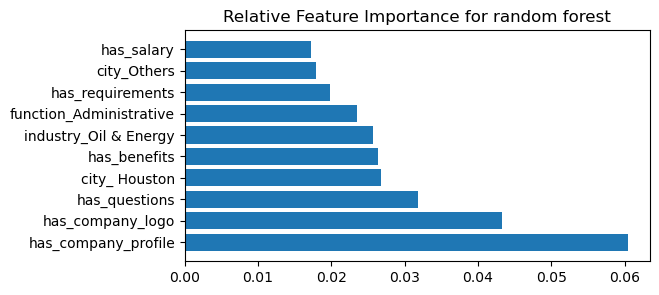

In [67]:
# Evaluate the feature importance of the best performing model

# in built model feature importance
plt.figure(figsize=(6,3))
num=10


dt2_importances = rfc.feature_importances_
order = np.flip(np.argsort(dt2_importances))[0:num]
plt.barh(range(num),
         dt2_importances[order],
         tick_label=xtrain.columns[order])
plt.title("Relative Feature Importance for random forest")


In [41]:
# sklearn permutation importance 
from sklearn.inspection import permutation_importance

r = permutation_importance(rfc, xtest, ytest,
                           n_repeats=30,
                           random_state=0)

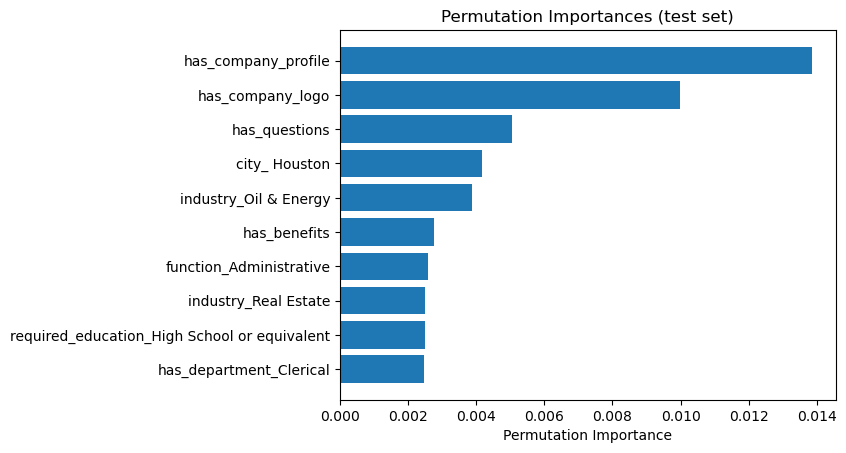

In [50]:
# # Calculate permutation importances
perm_importance = permutation_importance(rfc, xtest.values, ytest, n_repeats=30, random_state=42)

# Get feature names
feature_names = xtest.columns

# Plotting the permutation importances
sorted_idx = perm_importance.importances_mean.argsort()
n =  10
sorted_idx_top_n = sorted_idx[-n:]

plt.barh(range(n), perm_importance.importances_mean[sorted_idx_top_n], align='center')
plt.yticks(range(n), [feature_names[i] for i in sorted_idx_top_n])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (test set)')
plt.show()

In [52]:
# LIME 
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(xtrain.values,
                                 feature_names=xtrain.columns,
                                 class_names = ['normal', 'fraud'],
                                 mode='classification')

In [81]:
# try on first test case
idx = 1

exp = explainer.explain_instance(xtrain.values[idx],
                                 rfc.predict_proba,
                                 num_features = xtrain.iloc[idx,:].size)

print('Observation #: %d' % idx)
print('Probability(Fraud) =', rfc.predict_proba(xtrain.values)[idx][1])
print('True class: %s' % ytrain[idx])

c:\Users\Jason\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Observation #: 1


c:\Users\Jason\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Probability(Fraud) = 0.0
True class: 0


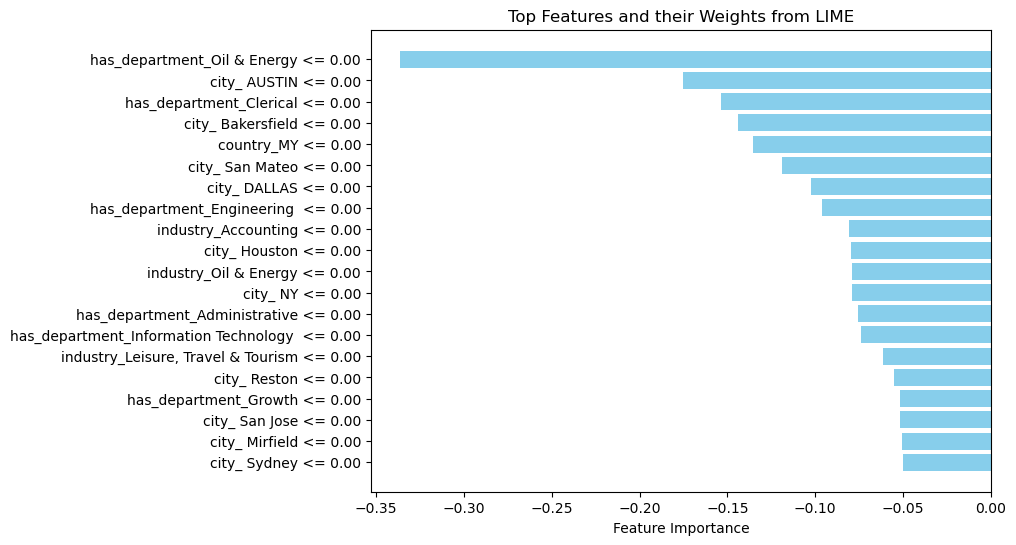

In [83]:
### Plot the results
top_n = 20
top_features = exp.as_list()[:top_n]
# exp.as_pyplot_figure();

# Extract feature names and weights
features, weights = zip(*top_features)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), weights, align='center', color='skyblue')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Top Features and their Weights from LIME')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [94]:
# try on second test case
idx = 5

exp = explainer.explain_instance(xtrain.values[idx],
                                 rfc.predict_proba,
                                 num_features = xtrain.iloc[idx,:].size)

print('Observation #: %d' % idx)
print('Probability(Fraud) =', rfc.predict_proba(xtrain.values)[idx][1])
print('True class: %s' % ytrain.reset_index(drop=True)[idx])

c:\Users\Jason\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Observation #: 5


c:\Users\Jason\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Probability(Fraud) = 0.09488803002585446
True class: 1


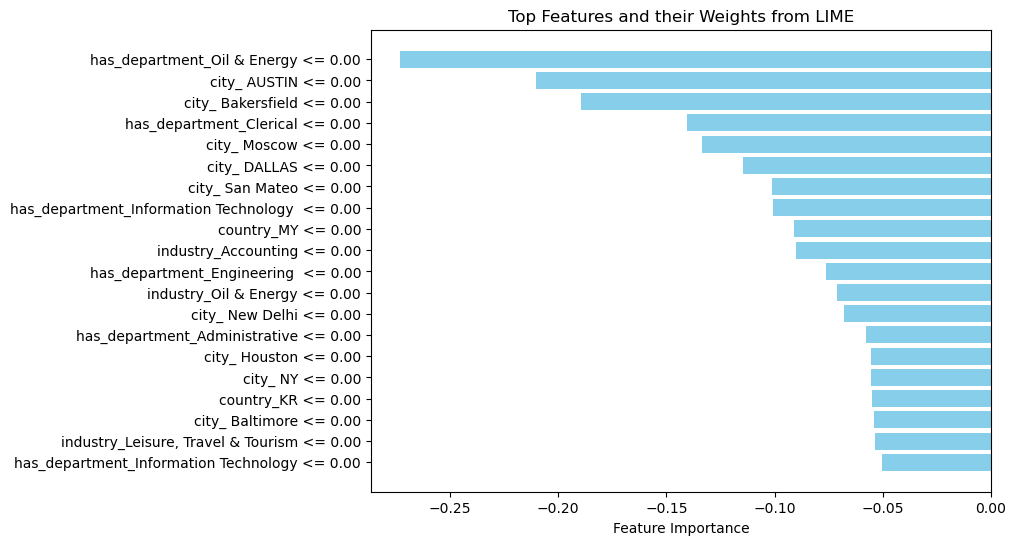

In [95]:
### Plot the results
top_n = 20
top_features = exp.as_list()[:top_n]
# exp.as_pyplot_figure();

# Extract feature names and weights
features, weights = zip(*top_features)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), weights, align='center', color='skyblue')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Top Features and their Weights from LIME')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()